In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [45]:
path = r"C:\Users\gonza\OneDrive\Documentos\datascience-thebridge-master\ejercicios gonzalo\DATA\sf-crime"
file = "train.csv"
df = pd.read_csv(os.path.join(path,file))

In [46]:
df.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Dates       878049 non-null  object 
 1   Category    878049 non-null  object 
 2   Descript    878049 non-null  object 
 3   DayOfWeek   878049 non-null  object 
 4   PdDistrict  878049 non-null  object 
 5   Resolution  878049 non-null  object 
 6   Address     878049 non-null  object 
 7   X           878049 non-null  float64
 8   Y           878049 non-null  float64
dtypes: float64(2), object(7)
memory usage: 60.3+ MB


In [48]:
df.duplicated(keep=False).value_counts()

False    873688
True       4361
dtype: int64

In [49]:
df = df.drop_duplicates()

In [50]:
df.describe(include="object")

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address
count,875726,875726,875726,875726,875726,875726,875726
unique,389257,39,879,7,10,17,23228
top,2011-01-01 00:01:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,800 Block of BRYANT ST
freq,185,174320,59765,133371,156528,525122,26245


In [51]:
df["Dates"] = pd.to_datetime(df["Dates"],infer_datetime_format=True)

In [52]:
df["Year"] = df["Dates"].dt.year
df["Month"] = df["Dates"].dt.month
df["Day"] = df["Dates"].dt.day
df["Hour"] = df["Dates"].dt.hour

In [53]:
df.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23


In [54]:
df["Day_week_numeric"] = df["Dates"].dt.dayofweek

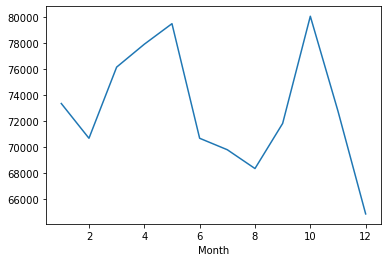

In [55]:
df.groupby(["Month"])["Dates"].count().plot()

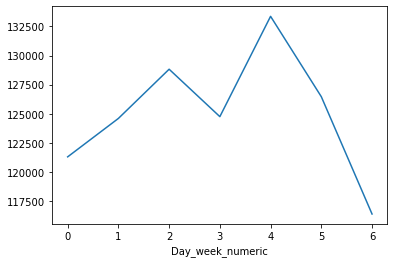

In [56]:
df.groupby(["Day_week_numeric"])["Dates"].count().plot()

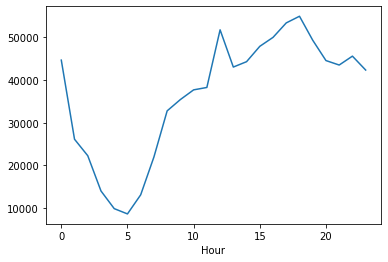

In [57]:
df.groupby(["Hour"])["Dates"].count().plot()

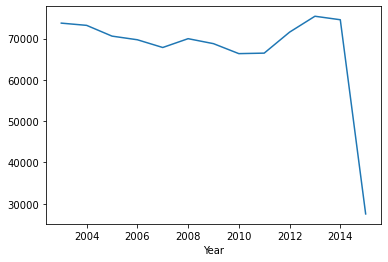

In [115]:
df.groupby(["Year"])["Dates"].count().plot()

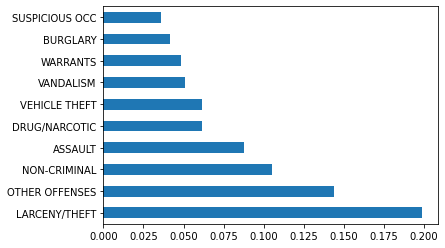

In [114]:
df.Category.value_counts(normalize=True,sort=True,ascending=False).head(10).plot(kind="barh")

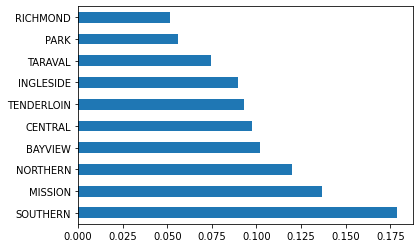

In [113]:
df.PdDistrict.value_counts(normalize=True,sort=True,ascending=False).plot(kind="barh")


In [103]:
# podemos ver los porcentajes de delitos por barrio (ojo ver normalize por index y style por axis)
distric_category = pd.crosstab(columns=df["PdDistrict"],index=df["Category"],normalize="index")
distric_category.style.background_gradient(cmap='Blues',axis=1)


PdDistrict,BAYVIEW,CENTRAL,INGLESIDE,MISSION,NORTHERN,PARK,RICHMOND,SOUTHERN,TARAVAL,TENDERLOIN
Category,,,,,,,,,,
ARSON,0.259921,0.073413,0.120370,0.095238,0.098545,0.042989,0.068122,0.122354,0.079365,0.039683
ASSAULT,0.128165,0.090751,0.110942,0.145102,0.108208,0.045720,0.041632,0.158498,0.071080,0.099902
BAD CHECKS,0.083744,0.160099,0.078818,0.113300,0.133005,0.036946,0.076355,0.182266,0.088670,0.046798
BRIBERY,0.193772,0.041522,0.183391,0.228374,0.062284,0.024221,0.027682,0.128028,0.058824,0.051903
BURGLARY,0.106940,0.122923,0.090902,0.102077,0.159208,0.078552,0.073306,0.131038,0.094508,0.040546
DISORDERLY CONDUCT,0.050545,0.114537,0.039648,0.254347,0.104336,0.062601,0.025041,0.118247,0.037561,0.193137
DRIVING UNDER THE INFLUENCE,0.078924,0.070547,0.090829,0.157407,0.114638,0.077601,0.140653,0.134921,0.089065,0.045414
DRUG/NARCOTIC,0.083384,0.033476,0.043992,0.162280,0.083607,0.047664,0.018528,0.171034,0.028357,0.327677
DRUNKENNESS,0.056816,0.120879,0.044424,0.182838,0.086042,0.087211,0.034604,0.224223,0.060323,0.102642


In [124]:
distric_category.max(axis=1)

Category
ARSON                          0.259921
ASSAULT                        0.158498
BAD CHECKS                     0.182266
BRIBERY                        0.228374
BURGLARY                       0.159208
DISORDERLY CONDUCT             0.254347
DRIVING UNDER THE INFLUENCE    0.157407
DRUG/NARCOTIC                  0.327677
DRUNKENNESS                    0.224223
EMBEZZLEMENT                   0.236254
EXTORTION                      0.199219
FAMILY OFFENSES                0.284836
FORGERY/COUNTERFEITING         0.220355
FRAUD                          0.205686
GAMBLING                       0.212329
KIDNAPPING                     0.148718
LARCENY/THEFT                  0.238986
LIQUOR LAWS                    0.260664
LOITERING                      0.342171
MISSING PERSON                 0.189918
NON-CRIMINAL                   0.212675
OTHER OFFENSES                 0.168665
PORNOGRAPHY/OBSCENE MAT        0.227273
PROSTITUTION                   0.486570
RECOVERED VEHICLE              

In [125]:

df["Block"] = df.Address.str.contains("Block").astype(int)

In [134]:
df["Weekend"]= np.where((df["Day_week_numeric"] >= 3) & (df["Day_week_numeric"] <=5),1,0)

In [137]:
df.head(3)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Day,Hour,Day_week_numeric,Block,Weekend
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,2,0,0
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,13,23,2,0,0
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,13,23,2,0,0
